In [10]:
import os, sys
from datetime import datetime

from garminconnect import Garmin

email = os.getenv("EMAIL")
password = os.getenv("PASSWORD")
today = datetime.date.today()

api = Garmin(email, password)
api.login()

heartrates = api.get_heart_rates(f'{today.isoformat()}')
bloodoxy = api.get_spo2_data(f'{today.isoformat()}')
breathing = api.get_respiration_data(f'{today.isoformat()}')
print(heartrates, bloodoxy, breathing)


AttributeError: 'method_descriptor' object has no attribute 'today'

# Align the data by creating a timestamped index dataframe



In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
heartrates['heartRateValues']

[[1678057200000, None],
 [1678081680000, 90],
 [1678081800000, 95],
 [1678081920000, 81],
 [1678082040000, 65],
 [1678082160000, 70],
 [1678082280000, 72],
 [1678082400000, 77],
 [1678082520000, 83],
 [1678082640000, 75],
 [1678082760000, 71],
 [1678082880000, 79],
 [1678083000000, 83],
 [1678083120000, 76],
 [1678083240000, 59],
 [1678083360000, 54],
 [1678083480000, 55],
 [1678083600000, 67],
 [1678083720000, 63],
 [1678083840000, 65],
 [1678083960000, 66],
 [1678084080000, 59],
 [1678084200000, 73],
 [1678084320000, 59],
 [1678084440000, 61],
 [1678084560000, 61],
 [1678084680000, 66],
 [1678084800000, 80],
 [1678084920000, 56],
 [1678085040000, 51],
 [1678085160000, 52],
 [1678085280000, 53],
 [1678085400000, 52],
 [1678085520000, 51],
 [1678085640000, 52],
 [1678085760000, 53],
 [1678085880000, 55],
 [1678086000000, 54],
 [1678086120000, 55],
 [1678086240000, 70],
 [1678086360000, 61],
 [1678086480000, 52],
 [1678086600000, 51],
 [1678086720000, 53],
 [1678086840000, 52],
 [167808

In [13]:
bloodoxy['spO2HourlyAverages']

[[1678082400000, 93],
 [1678086000000, 93],
 [1678089600000, 93],
 [1678093200000, 94],
 [1678096800000, 93]]

In [14]:
breathing['respirationValuesArray']

[[1678057320000, -1.0],
 [1678057440000, -1.0],
 [1678057560000, -1.0],
 [1678057680000, -1.0],
 [1678057800000, -1.0],
 [1678057920000, -1.0],
 [1678058040000, -1.0],
 [1678058160000, -1.0],
 [1678058280000, -1.0],
 [1678058400000, -1.0],
 [1678058520000, -1.0],
 [1678058640000, -1.0],
 [1678058760000, -1.0],
 [1678058880000, -1.0],
 [1678059000000, -1.0],
 [1678059120000, -1.0],
 [1678059240000, -1.0],
 [1678059360000, -1.0],
 [1678059480000, -1.0],
 [1678059600000, -1.0],
 [1678059720000, -1.0],
 [1678059840000, -1.0],
 [1678059960000, -1.0],
 [1678060080000, -1.0],
 [1678060200000, -1.0],
 [1678060320000, -1.0],
 [1678060440000, -1.0],
 [1678060560000, -1.0],
 [1678060680000, -1.0],
 [1678060800000, -1.0],
 [1678060920000, -1.0],
 [1678061040000, -1.0],
 [1678061160000, -1.0],
 [1678061280000, -1.0],
 [1678061400000, -1.0],
 [1678061520000, -1.0],
 [1678061640000, -1.0],
 [1678061760000, -1.0],
 [1678061880000, -1.0],
 [1678062000000, -1.0],
 [1678062120000, -1.0],
 [1678062240000,

In [46]:
columns = {
    'breathing': breathing['respirationValuesArray'],
    'bloodoxy': bloodoxy['spO2HourlyAverages'],
    'heartrate': heartrates['heartRateValues']
}

dicts = {}
for i, column in columns.items():
    dicts[i] = {datetime.utcfromtimestamp(int(str(item[0])[:-3])) : item[1] for item in column}

df = pd.DataFrame.from_dict(dicts, orient='columns')
df

,breathing,bloodoxy,heartrate
2023-03-05 23:02:00,-1.0,NaN,NaN
2023-03-05 23:04:00,-1.0,NaN,NaN
2023-03-05 23:06:00,-1.0,NaN,NaN
2023-03-05 23:08:00,-1.0,NaN,NaN
2023-03-05 23:10:00,-1.0,NaN,NaN
...,...,...,...
2023-03-06 10:40:00,14.0,NaN,50.0
2023-03-06 10:42:00,13.0,NaN,48.0
2023-03-06 10:44:00,14.0,NaN,49.0
2023-03-06 10:46:00,14.0,NaN,NaN


array([[<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >]], dtype=object)

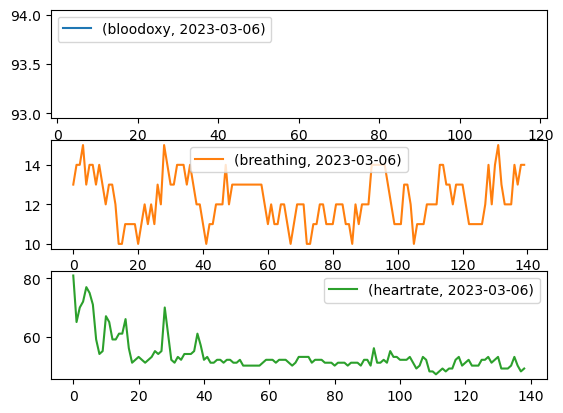

In [52]:
columns = df.index.date
index = df.groupby(columns).cumcount()
pivoted = df.pivot_table(index=index, columns=columns)

pivoted.plot(subplots=True, layout=(len(pivoted.columns), 1), sharex=False)

In [48]:
df = df[df.breathing > 0]

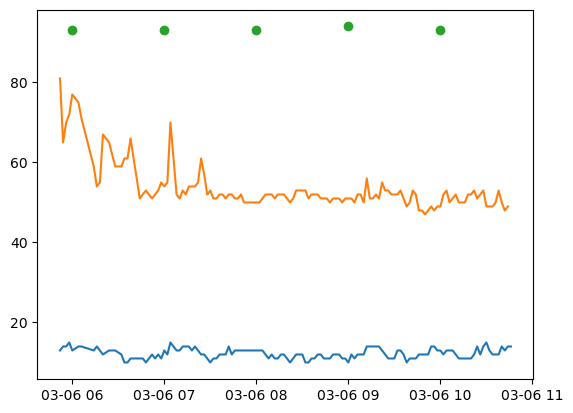

In [49]:
plt.plot(df.breathing)
plt.plot(df.heartrate)
plt.plot(df.bloodoxy, marker='o')

In [50]:
df

,breathing,bloodoxy,heartrate
2023-03-06 05:52:00,13.0,NaN,81.0
2023-03-06 05:54:00,14.0,NaN,65.0
2023-03-06 05:56:00,14.0,NaN,70.0
2023-03-06 05:58:00,15.0,NaN,72.0
2023-03-06 06:00:00,13.0,93.0,77.0
...,...,...,...
2023-03-06 10:38:00,12.0,NaN,53.0
2023-03-06 10:40:00,14.0,NaN,50.0
2023-03-06 10:42:00,13.0,NaN,48.0
2023-03-06 10:44:00,14.0,NaN,49.0


In [45]:
'12345000'[:-3]


'12345'